# Traveling Salesman Problem solved with different algorithms

Created by Eric Welch 3/2021

## Import statements: to run this script, make sure brute.py, greedy.py and utils_tsp.py are in the working directory

In [ ]:
import time
import numpy as np
from tabulate import tabulate
from brute import algorithm # Requires the script brute.py
from greedy import algorithm2 # Requires the script greedy.py
from python_tsp.exact import solve_tsp_dynamic_programming
import boto3
from braket.aws import AwsDevice
from braket.ocean_plugin import BraketSampler, BraketDWaveSampler
import networkx as nx
import dimod
import dwave_networkx as dnx
from dimod.binary_quadratic_model import BinaryQuadraticModel
from dwave.system.composites import EmbeddingComposite
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools
import pandas as pd
from utils_tsp import get_distance, traveling_salesperson # Requires the script utils_tsp
from braket.devices import LocalSimulator
from braket.circuits import Circuit

## Define the city distance array and create lists to hold city and timing data to be plotted later in the script

In [2]:
# 30 city distance matrix
cities_30 = np.array([[0,39,22,59,54,33,57,32,89,73,29,46,16,83,120,45,24,32,36,25,38,16,43,21,50,57,46,72,121,73], [39,0,20,20,81,8,49,64,63,84,10,61,25,49,81,81,58,16,72,60,78,24,69,18,75,88,68,44,83,52], [22,20,0,39,74,18,60,44,71,73,11,46,6,61,99,61,37,10,51,40,59,5,62,7,57,78,51,51,100,56], [59,20,39,0,93,27,51,81,48,80,30,69,45,32,61,97,75,31,89,78,97,44,83,38,84,100,77,31,63,42], [54,81,74,93,0,73,43,56,104,76,76,77,69,111,72,46,56,84,49,53,33,69,12,69,64,7,69,122,73,11], [33,8,18,27,73,0,45,61,71,88,8,63,22,57,87,77,54,18,68,56,71,20,61,13,75,80,68,52,90,60], [57,49,60,51,43,45,0,85,88,115,52,103,60,75,64,85,79,63,83,78,70,58,38,52,103,49,102,81,69,92], [32,64,44,81,56,61,85,0,74,43,55,23,40,81,97,17,8,50,8,7,23,41,53,48,19,53,17,70,92,63], [89,63,71,48,104,71,88,74,0,38,69,51,75,16,35,75,77,61,77,80,90,76,116,76,58,98,57,19,33,16], [73,84,73,80,76,88,115,43,38,0,81,28,72,53,55,38,49,70,42,50,53,75,83,80,24,69,27,49,51,39], [29,10,11,30,76,8,52,55,69,81,0,55,16,57,91,71,48,11,62,50,68,14,64,9,67,81,61,49,93,56], [46,61,46,69,77,63,103,23,51,28,55,0,44,59,81,32,26,46,29,29,45,47,76,53,15,73,9,49,77,40], [16,25,6,45,69,22,60,40,75,72,16,44,0,67,105,56,33,16,46,35,53,2,57,9,54,72,48,57,106,60], [83,49,61,32,111,57,75,81,16,53,57,59,67,0,39,88,82,51,87,85,103,67,113,65,70,109,67,12,39,19], [120,81,99,61,72,87,64,97,35,55,91,81,105,39,0,84,104,90,93,104,90,104,82,99,79,70,82,50,4,51], [45,81,61,97,46,77,85,17,75,38,71,32,56,88,84,0,23,67,9,21,15,57,48,64,19,41,23,80,81,70], [24,58,37,75,56,54,79,8,77,49,48,26,33,82,104,23,0,44,14,3,25,34,51,41,25,54,23,70,100,65], [32,16,10,32,84,18,63,50,61,70,11,46,16,51,90,67,44,0,58,47,67,16,72,15,59,88,52,42,90,47], [36,72,51,89,49,68,83,8,77,42,62,29,46,87,93,9,14,58,0,12,16,48,48,55,19,45,21,77,89,69], [25,60,40,78,53,56,78,7,80,50,50,29,35,85,104,21,3,47,12,0,22,36,48,43,26,51,24,73,100,68], [38,78,59,97,33,71,70,23,90,53,68,45,53,103,90,15,25,67,16,22,0,54,33,59,33,31,37,93,88,84], [16,24,5,44,69,20,58,41,76,75,14,47,2,67,104,57,34,16,48,36,54,0,57,7,56,72,50,57,105,61], [43,69,62,83,12,61,38,53,116,83,64,76,57,113,82,48,51,72,48,48,33,57,0,57,66,18,69,113,84,115], [21,18,7,38,69,13,52,48,76,80,9,53,9,65,99,64,41,15,55,43,59,7,57,0,63,74,57,57,101,61], [50,75,57,84,64,75,103,19,58,24,67,15,54,70,79,19,25,59,19,26,33,56,66,63,0,59,7,61,74,52], [57,88,78,100,7,80,49,53,98,69,81,73,72,109,70,41,54,88,45,51,31,72,18,74,59,0,64,117,71,107], [46,68,51,77,69,68,102,17,57,27,61,9,48,67,82,23,23,52,21,24,37,50,69,57,7,64,0,57,77,48], [72,44,51,31,122,52,81,70,19,49,49,49,57,12,50,80,70,42,77,73,93,57,113,57,61,117,57,0,49,11], [121,83,100,63,73,90,69,92,33,51,93,77,106,39,4,81,100,90,89,100,88,105,84,101,74,71,77,49,0,48], [73,52,56,42,114,60,92,63,16,39,56,40,60,19,51,70,65,47,69,68,84,61,115,61,52,107,48,11,48,0]])

# Empty lists to append data for benchmark plotting later
city1, time1, city2, time2, city3, time3, city4, time4, city5, time5 = [], [], [], [], [], [], [], [], [], []

## Start the python algorithm

In [3]:
# Use python tsp solver (https://pypi.org/project/python-tsp/)
print('-------------------------------------------------------------------------------')
print('----------------------------- Starting python ---------------------------------')
print('-------------------------------------------------------------------------------')

for num in range(3,18): 
	start_time = time.time() # Start timer
	cities = cities_30[:num, :num] # Parse submatrix of size num x num
	path, length = solve_tsp_dynamic_programming(cities) # Call function to run tsp solver
	print('Number of cities = ', num)
	print('Path = ', path) 
	print('Path length = ', length)
	print('----- Time = %s seconds -----' % (time.time() - start_time))
	city1.append(num)
	time1.append((time.time() - start_time)) # End timer

print('-------------------------------------------------------------------------------')
print('----------------------------- Python finished ---------------------------------')
print('-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
----------------------------- Starting python ---------------------------------
-------------------------------------------------------------------------------
Number of cities =  3
Path =  [0, 1, 2]
Path length =  81
----- Time = 0.00015997886657714844 seconds -----
Number of cities =  4
Path =  [0, 1, 3, 2]
Path length =  120
----- Time = 0.00029778480529785156 seconds -----
Number of cities =  5
Path =  [0, 2, 1, 3, 4]
Path length =  209
----- Time = 0.0007772445678710938 seconds -----
Number of cities =  6
Path =  [0, 2, 5, 1, 3, 4]
Path length =  215
----- Time = 0.0005700588226318359 seconds -----
Number of cities =  7
Path =  [0, 2, 5, 1, 3, 6, 4]
Path length =  216
----- Time = 0.0018849372863769531 seconds -----
Number of cities =  8
Path =  [0, 2, 5, 1, 3, 6, 4, 7]
Path length =  250
----- Time = 0.0031499862670898438 seconds -----
Number of cities =  9
Path =  [0, 2, 5, 1, 3, 8, 6, 4, 7]
Path len

## Start the brute force algorithm as defined in brute.py

In [4]:
print('-------------------------------------------------------------------------------')
print('--------------------------- Starting Brute Force ------------------------------')
print('-------------------------------------------------------------------------------')

# Use online brute force algorithms (https://github.com/rohanp/travelingSalesman)
for num in range(3,10):
	start_time = time.time()
	cities = cities_30[:num, :num]
	path, length = algorithm(cities)
	print('Number of cities = ', num)
	print('Path = ', path)
	print('Path length = ', length)
	print('----- Time = %s seconds -----' % (time.time() - start_time))
	city2.append(num)
	time2.append((time.time() - start_time))

print('-------------------------------------------------------------------------------')
print('------------------------ Brute Force Finished ---------------------------------')
print('-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
--------------------------- Starting Brute Force ------------------------------
-------------------------------------------------------------------------------
Number of cities =  3
Path =  range(0, 3)
Path length =  4576
----- Time = 0.0002722740173339844 seconds -----
Number of cities =  4
Path =  (0, 1, 3, 2)
Path length =  6056
----- Time = 0.00042510032653808594 seconds -----
Number of cities =  5
Path =  (0, 2, 1, 3, 4)
Path length =  10760
----- Time = 0.0016269683837890625 seconds -----
Number of cities =  6
Path =  (0, 2, 5, 1, 3, 4)
Path length =  10436
----- Time = 0.01341104507446289 seconds -----
Number of cities =  7
Path =  (0, 2, 5, 1, 3, 6, 4)
Path length =  8568
----- Time = 0.12865781784057617 seconds -----
Number of cities =  8
Path =  (0, 2, 5, 1, 3, 6, 4, 7)
Path length =  6310
----- Time = 1.0848760604858398 seconds -----
Number of cities =  9
Path =  (0, 2, 5, 1, 3, 6, 8, 4, 7)
Path 

## Start the nearest neighbor algorithm as defined in greedy.py

In [5]:
print('-------------------------------------------------------------------------------')
print('---------------------- Starting Nearest Neighbor ------------------------------')
print('-------------------------------------------------------------------------------')

# Use online greddy algorithm (https://github.com/rohanp/travelingSalesman)
for num in range(3,31):
	start_time = time.time()
	cities = cities_30[:num, :num]
	path, length = algorithm2(cities)
	print('Number of cities = ', num)	
	print('Path = ', path)
	print('Path length = ', length)
	print('----- Time = %s seconds -----' % (time.time() - start_time))
	city3.append(num)
	time3.append((time.time() - start_time))

print('-------------------------------------------------------------------------------')
print('---------------------- Finished Nearest Neighbor ------------------------------')
print('-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
---------------------- Starting Nearest Neighbor ------------------------------
-------------------------------------------------------------------------------
Number of cities =  3
Path =  [0, 2, 1]
Path length =  1534
----- Time = 0.000820159912109375 seconds -----
Number of cities =  4
Path =  [0, 2, 1, 3]
Path length =  2334
----- Time = 0.0003299713134765625 seconds -----
Number of cities =  5
Path =  [0, 2, 1, 3, 4]
Path length =  6080
----- Time = 0.0004949569702148438 seconds -----
Number of cities =  6
Path =  [0, 2, 5, 1, 3, 4]
Path length =  5756
----- Time = 0.0008029937744140625 seconds -----
Number of cities =  7
Path =  [0, 2, 5, 1, 3, 6, 4]
Path length =  3888
----- Time = 0.0009400844573974609 seconds -----
Number of cities =  8
Path =  [0, 2, 5, 1, 3, 6, 7, 4]
Path length =  4478
----- Time = 0.0017781257629394531 seconds -----
Number of cities =  9
Path =  [0, 2, 5, 1, 3, 6, 7, 4, 8]
Path

## Start AWS classical (brute force) simulator

In [6]:
# to do: implement the AWS quantum simulator, DWAVE, IonQ and Rigetti calls
# Please enter the S3 bucket you created during onboarding in the code below
# Use AWS Braket with quantum simulators and DWAVE, IonQ and Rigetti (https://github.com/aws/amazon-braket-examples/blob/main/quantum_annealing/Dwave_TravelingSalesmanProblem/Dwave_TravelingSalesmanProblem.ipynb)
#my_bucket = f"amazon-braket-Your-Bucket-Name" # the name of the bucket
#my_prefix = "Your-Folder-Name" # the name of the folder in the bucket
#s3_folder = (my_bucket, my_prefix)

# Call device
#device = LocalSimulator()

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

print('-------------------------------------------------------------------------------')
print('-------------------- Starting AWS Classical Simulator -------------------------')
print('-------------------------------------------------------------------------------')

# Change shape of cities_30[rows, columns] to refelct the number of cities
for num in range(3,10):
	data = [] # Empty list for city and route data
	start_time = time.time() # Start timer
	G = nx.from_numpy_array(cities_30[:num, :num]) # Get data from cities_30
	tsp_qubo = dnx.algorithms.tsp.traveling_salesman_qubo(G) # Call QUBO hyperparameter optimization
	
	# Lagrange method used to ensure each city is only visited once
	lagrange = None 
	weight = 'weight'
	N = G.number_of_nodes()

	if lagrange is None:
		if G.number_of_edges() > 0:
			lagrange = G.size(weight=weight)*G.number_of_nodes()/G.number_of_edges()
		else:
			lagrange = 2

	sampler = dimod.SimulatedAnnealingSampler() # Call classical simulated annealing
	#route = dnx.traveling_salesman_qubo(G, lagrange=lagrange,weight=weight) # Solve TSP
	route = dnx.traveling_salesman(G, sampler, lagrange=lagrange, weight=weight) # Solve TSP with brute force classical algorithm
	print('Number of cities = ', num)
	print('----- Time = %s seconds ----' % (time.time() - start_time))	
	data.append([num, route]) # Add city and route data
	with open('num_cities-route.data', 'w') as f: # Save data to an external file ...lots of data
		for item in data:
			f.write("%s\n" % item)
		f.close()

	city4.append(num)
	time4.append((time.time() - start_time))


print('-------------------------------------------------------------------------------')
print('-------------------- Finished AWS Classical Simulator -------------------------')
print('-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
-------------------- Starting AWS Classical Simulator -------------------------
-------------------------------------------------------------------------------
Number of cities =  3
----- Time = 0.5083918571472168 seconds ----
Number of cities =  4
----- Time = 1.1170291900634766 seconds ----
Number of cities =  5
----- Time = 2.2597737312316895 seconds ----
Number of cities =  6
----- Time = 3.9570159912109375 seconds ----
Number of cities =  7
----- Time = 6.773161888122559 seconds ----
Number of cities =  8
----- Time = 9.636722087860107 seconds ----
Number of cities =  9
----- Time = 13.833565950393677 seconds ----
-------------------------------------------------------------------------------
-------------------- Finished AWS Classical Simulator -------------------------
-------------------------------------------------------------------------------


## Start AWS quantum simulator

-------------------------------------------------------------------------------
--------------------- Starting AWS Quantum Simulator --------------------------
-------------------------------------------------------------------------------
Number of cities =  3
----- Time = 0.0010581016540527344 seconds ----
Number of cities =  4
----- Time = 0.0010330677032470703 seconds ----
Number of cities =  5
----- Time = 0.0015320777893066406 seconds ----
Number of cities =  6
----- Time = 0.0017039775848388672 seconds ----
Number of cities =  7
----- Time = 0.0031533241271972656 seconds ----
Number of cities =  8
----- Time = 0.0039288997650146484 seconds ----
Number of cities =  9
----- Time = 0.005246877670288086 seconds ----
Number of cities =  10
----- Time = 0.005423784255981445 seconds ----
Number of cities =  11
----- Time = 0.00710296630859375 seconds ----
Number of cities =  12
----- Time = 0.008939981460571289 seconds ----
Number of cities =  13
----- Time = 0.011619806289672852 secon

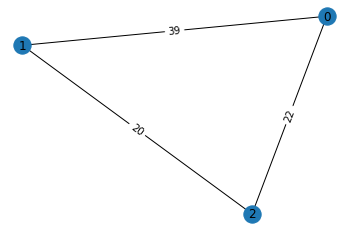

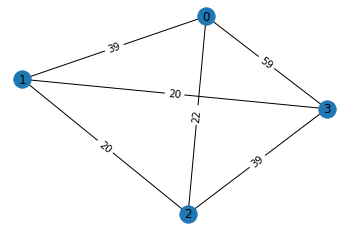

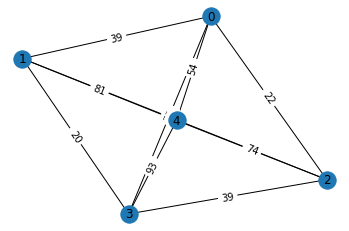

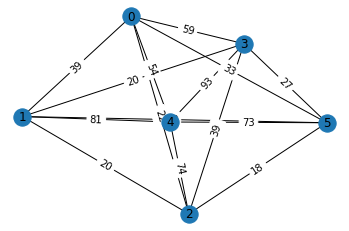

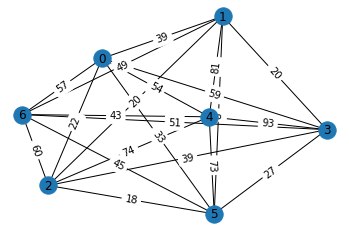

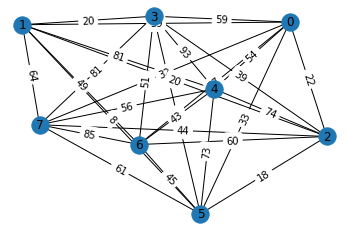

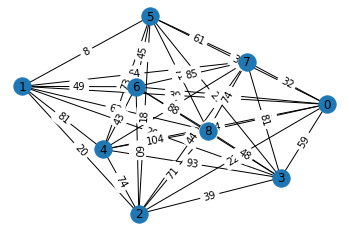

-------------------------------------------------------------------------------
--------------------- Finished AWS Quantum Simulator --------------------------
-------------------------------------------------------------------------------


In [7]:
print('-------------------------------------------------------------------------------')
print('--------------------- Starting AWS Quantum Simulator --------------------------')
print('-------------------------------------------------------------------------------')
for num in range(3,31):
	data = [] # Empty list for city and route data
	start_time = time.time() # Start timer
	G = nx.from_numpy_array(cities_30[:num, :num]) # Get data from cities_30
	tsp_qubo = dnx.algorithms.tsp.traveling_salesman_qubo(G) # Call QUBO hyperparameter optimization

	# Lagrange method used to ensure each city is only visited once
	lagrange = None
	weight = 'weight'
	N = G.number_of_nodes()

	if lagrange is None:
		if G.number_of_edges() > 0:
			lagrange = G.size(weight=weight)*G.number_of_nodes()/G.number_of_edges()
		else:
			lagrange = 2

	sampler = dimod.SimulatedAnnealingSampler() # Call classical simulated annealing
	route = dnx.traveling_salesman_qubo(G, lagrange=lagrange,weight=weight) # Solve TSP with quantum algoritm
	#route = dnx.traveling_salesman(G, sampler, lagrange=lagrange, weight=weight)
	print('Number of cities = ', num)
	print('----- Time = %s seconds ----' % (time.time() - start_time))
	data.append([num, route]) # Add city and route data
	with open('num_cities-route.data', 'w') as f: # Save data to an external file ...lots of data
		for item in data:
			f.write("%s\n" % item)
		f.close()

	city5.append(num)
	time5.append((time.time() - start_time))

# Plot only first 7 graphs ...gets messy after 10 cities
for num in range(3,10):
	G = nx.from_numpy_array(cities_30[:num, :num])
	pos = nx.spring_layout(G, seed=seed)

	# Graph characteristics
	nodes = G.nodes()
	edges = G.edges()
	weights = nx.get_edge_attributes(G, 'weight')

	# Show graph
	plt.axis('off')
	nx.draw_networkx(G, pos, with_labels=True)
	nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
	plt.show()

print('-------------------------------------------------------------------------------')
print('--------------------- Finished AWS Quantum Simulator --------------------------')
print('-------------------------------------------------------------------------------')

## Start AWS quantum machines: Need to assign a bucket and s3 location

In [8]:
# To-do: Add quantum simulators and quantum hardware

#print('-------------------------------------------------------------------------------')
#print('--------------------- Starting AWS Quantum Computer ---------------------------')
#print('-------------------------------------------------------------------------------')
#
#for num in range(3,31):
#	data = [] # Empty list for city and route data
#	start_time = time.time() # Start timer
#	G = nx.from_numpy_array(cities_30[:num, :num]) # Get data from cities_30
#	tsp_qubo = dnx.algorithms.tsp.traveling_salesman_qubo(G) # Call QUBO hyperparameter optimization
#       
#	# Will need to change the first sampler line to reflect the correct quantum machine
#	sampler = BracketDWaveSampler(s3_folder, 'arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6') # Call quantum simulated annealing          
#	sampler = EmbeddingComposite(sampler) 
#
#	# Lagrange method used to ensure each city is only visited once
#	lagrange = None
#	weight = 'weight'
#	N = G.number_of_nodes()
#
#	num_shots = 1000
#	start_city = 0
#	best_distance = sum(weights.values())
#
#	for lagrange in lagrange_list:
#		#print('Running quantum annealing for TSP with Lagrange parameter=', lagrange)
#		route = traveling_salesperson(G, sampler, lagrange=lagrange, start=start_city, num_reads=num_shots, answer_mode="histogram")
#
#		# print distance
#		total_dist, distance_with_return = get_distance(route, data)
#    
#		# update best values
#		if distance_with_return < best_distance:
#			best_distance = distance_with_return
#			best_route = route
#
#	print('---FINAL SOLUTION---')
#	print('Best solution found with D-Wave:', best_route)
#	print('Total distance (including return):', best_distance)
#	print('----- Time = %s seconds ----' % (time.time() - start_time))
#
#	#if lagrange is None:
#	#	if G.number_of_edges() > 0:
#	#		lagrange = G.size(weight=weight)*G.number_of_nodes()/G.number_of_edges()
#	#	else:
#	#		lagrange = 2
#	
#	#route = dnx.traveling_salesman(G, sampler, lagrange=lagrange)
#	data.append([num, route]) # Add city and route data   
#	with open('num_cities-route.data', 'w') as f: # Save data to an external file ...lots of data
#		for item in data:                             
#			f.write("%s\n" % item)                
#		f.close()                                     
#                                                              
#	city6.append(num)                                     
#	time6.append((time.time() - start_time))              
#        print('Number of cities = ', num)                     
#        print('----- Time = %s seconds ----' % (time.time() - start_time))
#

## Plot the city (number of nodes) vs timing data for all method (will need to add city6 and time6 when implementing dwave/rigetti/ionq)

-------------------------------------------------------------------------------
------------------------ Plotting Timing Results ------------------------------
-------------------------------------------------------------------------------


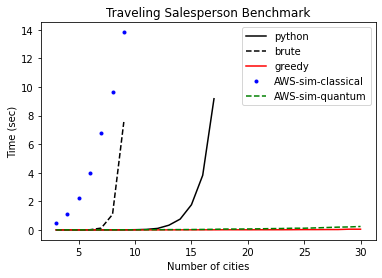

In [9]:
print('-------------------------------------------------------------------------------')
print('------------------------ Plotting Timing Results ------------------------------')
print('-------------------------------------------------------------------------------')

# Plot time as a function of number of cities (nodes on the graph)
labels = ['python', 'brute', 'greedy',  'AWS-sim-classical', 'AWS-sim-quantum']
fig, ax = plt.subplots()
plt.xlabel('Number of cities')
plt.ylabel('Time (sec)')
plt.title('Traveling Salesperson Benchmark')
ax.plot(city1,time1, 'k-', label=labels[0])
ax.plot(city2,time2, 'k--', label=labels[1])
ax.plot(city3,time3, 'r-', label=labels[2])
ax.plot(city4,time4, 'b.', label=labels[3])
ax.plot(city5,time5, 'g--', label=labels[4])
leg = ax.legend()
plt.savefig('timing_data.tiff')
plt.show()